<a href="https://colab.research.google.com/github/Manuelstv/dados-astronomicos/blob/main/astro_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math
sns.set()
from scipy.stats import norm,t

Permitir o collab acessar arquivos do google drive

In [ ]:
from google.colab import drive
drive.mount("/content/mdrive")

Mounted at /content/mdrive


In [ ]:
df = pd.read_csv('/content/mdrive/My Drive/1.0Msun-Z0.00001.dat', delim_whitespace=True, skiprows =1, header = None)
df = df.rename(columns={0:'Log L',1:'Log Teff',2:'Tc',3:'Ro_c',4:'log(age/Myr)',5:'Massa',6:'Lpp',7:'Lcno',8:'LHe',9:'Hcen',10:'Hecen',11:'C12cen',12:'O16cen'})

In [ ]:
df.dtypes

Log L           float64
Log Teff        float64
Tc              float64
Ro_c            float64
log(age/Myr)    float64
Massa           float64
Lpp             float64
Lcno            float64
LHe             float64
Hcen            float64
Hecen           float64
C12cen          float64
O16cen          float64
dtype: object

In [ ]:
df.shape

(84837, 13)

In [ ]:
df.describe()

,Log L,Log Teff,Tc,Ro_c,log(age/Myr),Massa,Lpp,Lcno,LHe,Hcen,Hecen,C12cen,O16cen
count,84837.000000,84837.000000,84837.000000,84837.000000,84837.000000,84837.000000,84837.000000,84837.000000,84837.000000,8.483700e+04,8.483700e+04,8.483700e+04,8.483700e+04
mean,2.782801,3.706017,1.782361,5.720613,3.781448,0.857738,-1.648312,-2.017917,-1.558320,3.095044e-03,4.544647e-01,1.708585e-01,3.715680e-01
std,0.852013,0.142662,0.336408,0.623719,0.144906,0.105524,5.762204,8.098329,16.182298,3.905107e-02,4.957896e-01,1.568923e-01,3.415393e-01
min,-5.229736,3.400560,-0.348152,1.960170,-2.000000,0.564130,-99.000000,-99.000000,-99.000000,-1.341690e-63,1.968180e-46,8.397180e-09,2.464110e-07
25%,2.276307,3.653964,1.589900,5.459778,3.785582,0.834260,-2.671053,-4.820251,0.670279,3.906250e-53,2.175460e-45,3.009140e-06,2.744620e-07
50%,2.934180,3.674932,1.901328,5.806759,3.791300,0.890720,-0.148127,0.873381,2.138204,3.906250e-53,2.439790e-45,3.136640e-01,6.863190e-01
75%,3.364488,3.701588,1.991361,6.234997,3.791827,0.893240,0.145415,2.498679,3.364107,9.990870e-51,9.999870e-01,3.136640e-01,6.863190e-01
max,3.960902,5.168929,2.281804,6.484908,4.356236,1.000000,1.241507,3.720006,10.604031,7.548910e-01,9.999900e-01,5.078810e-01,7.647700e-01


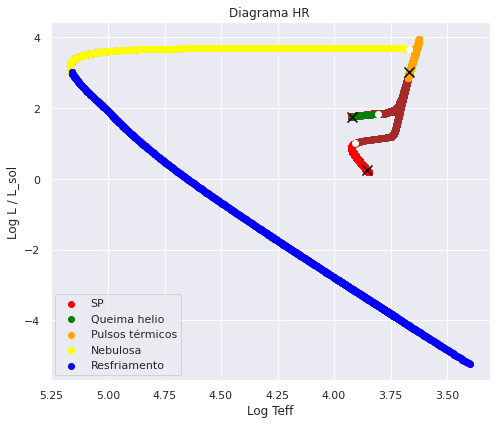

In [ ]:
fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(df['Log Teff'], df['Log L'], color ="brown")
#Para a seq principal, exigimos que o hidrogênio central seja maior que 10^-10
df_sp = df[df['Hcen']>10**(-10)]
ax.scatter(df_sp['Log Teff'], df_sp['Log L'], label ="SP", color ="red")
#Na queima do helio, exigimos que exista alguma variação relevante na variação da quantidade de helio central
df_he = df[df['Hecen'].diff()>0.0029]
ax.scatter(df_he['Log Teff'], df_he['Log L'], label ="Queima helio", color ="green")
#Nos pulsos termicos, examinamos graficamente, analisamos Lhe e LOG l
df_pul = df[53000:81000]
ax.scatter(df_pul['Log Teff'], df_pul['Log L'], label ="Pulsos térmicos", color ="orange")
#Na nebulosa, examinamos gráficos da luminosidade e Teff
df_neb = df[81000:84000]
ax.scatter(df_neb['Log Teff'], df_neb['Log L'], color ="yellow", label ="Nebulosa")
#No resfriamento, examinamos os gráficos da luminosidade e Teff
df_res = df[84000:85000]
ax.scatter(df_res['Log Teff'], df_res['Log L'], color ="blue", label ="Resfriamento")

ax.scatter(df_sp['Log Teff'].iloc[0], df_sp['Log L'].iloc[0], color ="black", marker = 'x', s = 100)
ax.scatter(df_he['Log Teff'].iloc[0], df_he['Log L'].iloc[0], color ="black", marker = 'x', s = 100)
ax.scatter(df_pul['Log Teff'].iloc[0], df_pul['Log L'].iloc[0], color ="black", marker = 'x', s = 100)
#ax.scatter(df_neb['Log Teff'].iloc[0], df_neb['Log L'].iloc[0], color ="black", marker = 'x', s = 100)
#ax.scatter(df_res['Log Teff'].iloc[0], df_res['Log L'].iloc[0], color ="black", marker = 'x', s = 100)

ax.scatter(df_sp['Log Teff'].iloc[-1], df_sp['Log L'].iloc[-1], color ="white")
ax.scatter(df_he['Log Teff'].iloc[-1], df_he['Log L'].iloc[-1], color ="white")
ax.scatter(df_pul['Log Teff'].iloc[-1], df_pul['Log L'].iloc[-1], color ="white")
#ax.scatter(df_neb['Log Teff'].iloc[-1], df_neb['Log L'].iloc[-1], color ="white")
#ax.scatter(df_res['Log Teff'].iloc[-1], df_res['Log L'].iloc[-1], color ="white")

plt.xlabel("Log Teff")
plt.ylabel("Log L / L_sol")
ax.invert_xaxis()
ax.set_title('Diagrama HR')
ax.legend()
fig.savefig("HR")
fig.tight_layout()
fig.show()

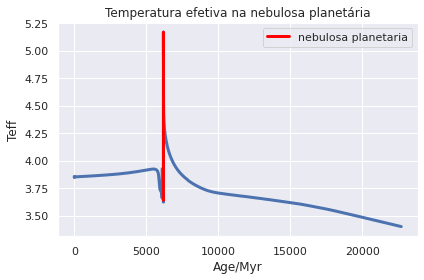

In [ ]:
fig, ax3 = plt.subplots(figsize=(6,4))
ax3.plot(10**df['log(age/Myr)'], df['Log Teff'], lw =3)
ax3.plot(10**df['log(age/Myr)'][80000:84100], df['Log Teff'][80000:84100], lw =3, color ='red', label ="nebulosa planetaria")
ax3.set_ylabel('Teff')
ax3.set_xlabel('Age/Myr')
ax3.legend()
ax3.set_title("Temperatura efetiva na nebulosa planetária")
ax3.legend()
#ax3.set_xlim(6150,6250)
ax3.get_xaxis().get_major_formatter().set_useOffset(False)
fig.tight_layout()
fig.show()
fig.savefig("lum")

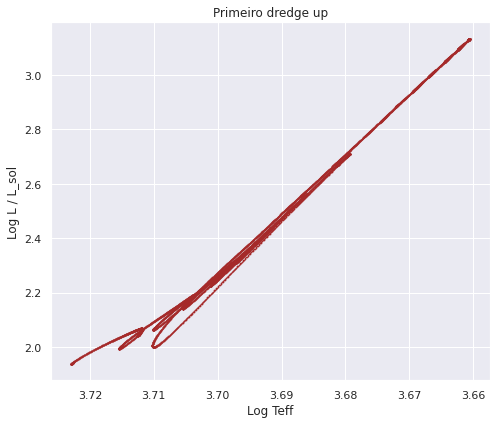

In [ ]:
fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(df['Log Teff'][25000:33000], df['Log L'][25000:33000], color ="brown", s= 0.5)

#ax.set_xlim(3.4,4.5)
#ax.set_ylim(1.75,4.0)
plt.xlabel("Log Teff")
plt.ylabel("Log L / L_sol")
ax.invert_xaxis()
ax.set_title('Primeiro dredge up')
fig.savefig("drege up")
fig.tight_layout()
fig.show()

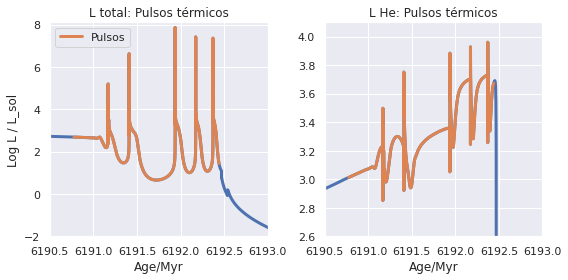

In [ ]:
#Pulsos térmicos
#pag 33 e 34 da apostila
fig, (ax,ax2) = plt.subplots(1,2,figsize=(8,4))
ax.plot(10**df['log(age/Myr)'], df['LHe'], lw =3)
ax.plot(10**df_pul['log(age/Myr)'], df_pul['LHe'], label ='Pulsos', lw =3)
ax2.plot(10**df['log(age/Myr)'], df['Log L'], lw =3)
ax2.plot(10**df_pul['log(age/Myr)'], df_pul['Log L'], lw =3)

ax.set_ylabel('Log L / L_sol')
ax.set_xlabel('Age/Myr')
ax2.set_xlabel('Age/Myr')
ax.set_title("L total: Pulsos térmicos")
ax2.set_title("L He: Pulsos térmicos")
ax2.set_ylim(2.6,4.1)
ax.set_ylim(-2,8.1)
ax.set_xlim(6190.5,6193)
ax2.set_xlim(6190.5,6193)
ax.legend()
fig.tight_layout()
fig.show()
fig.savefig("luminxtempo")

In [ ]:
print("Idade fim sp:", 10**df_sp.iloc[-1]['log(age/Myr)'])
print("Idade inicio queima helio:",10**df_he.iloc[0]['log(age/Myr)'])
print("Idade fim queima helio:", 10**df_he.iloc[-1]['log(age/Myr)'])
print("Idade no ponto de maior temperaura efetiva antes de entrar na curva de resfriamento das anãs brancas", 10**df_neb.iloc[-1]['log(age/Myr)'])

Idade fim sp: 5759.03824426923
Idade inicio queima helio: 6122.043565263845
Idade fim queima helio: 6173.365139272146
Idade no ponto de maior temperaura efetiva antes de entrar na curva de resfriamento das anãs brancas 6192.469747294466


In [ ]:
df2 = df_res[10**df_res['Log Teff'] > 29860]
df2  = df2[10**df2['Log Teff'] < 30140]
print("idade curva de resfriamento (T =30 000K): ", 10**df2.iloc[-1]['log(age/Myr)'])
df2 = df_res[10**df_res['Log Teff'] > 9990]
df2  = df2[10**df2['Log Teff'] < 10010]
print("idade curva de resfriamento (T =10 000K): ", 10**df2.iloc[-1]['log(age/Myr)'])

idade curva de resfriamento (T =30 000K):  6204.417810393921
idade curva de resfriamento (T =10 000K):  6802.126065858339


**Ciclos cno e pp**

Luminosidade inicio SP 1.7364568667879465
Luminosidade fim SP 10.00525127232257


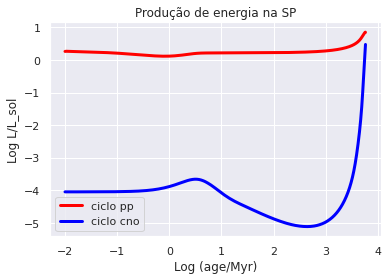

In [ ]:
#ciclos cno e pp
fig, ax = plt.subplots(figsize=(5.5,4))
ax.plot(df_sp['log(age/Myr)'], df_sp['Lpp'], label = "ciclo pp", color ="red", lw =3)
ax.plot(df_sp['log(age/Myr)'], df_sp['Lcno'], label = "ciclo cno", color ="blue", lw =3)
ax.set_title("Produção de energia na SP")
ax.set_xlabel("Log (age/Myr)")
ax.set_ylabel("Log L/L_sol")
ax.legend()
fig.tight_layout()
fig.show()
fig.savefig("ProdSP")

print("Luminosidade inicio SP", 10**df_sp['Log L'].iloc[0])
print("Luminosidade fim SP", 10**df_sp['Log L'].iloc[-1])

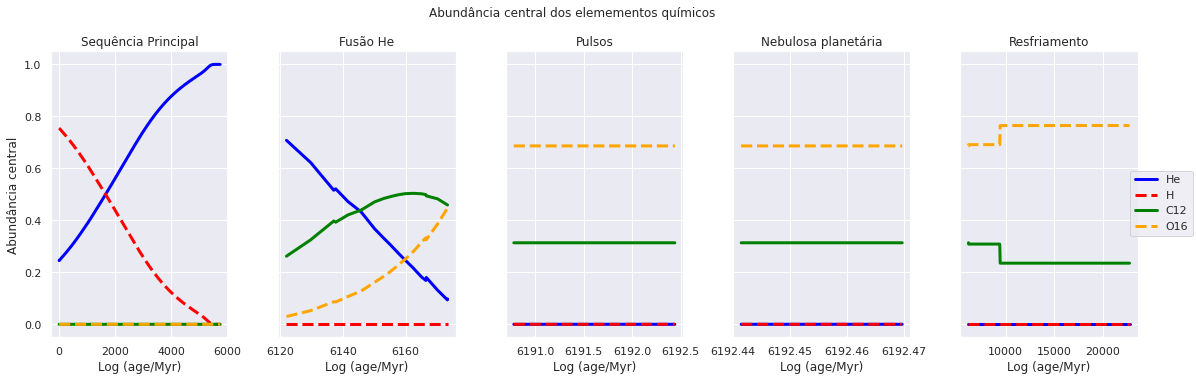

In [ ]:
#sp,he, neb pul res
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(16,5), sharey = True)

ax1.plot(10**df_sp['log(age/Myr)'], df_sp['Hecen'], color ="blue",lw=3, label ="He")
ax2.plot(10**df_he['log(age/Myr)'], df_he['Hecen'], color ="blue",lw=3)
ax3.plot(10**df_pul['log(age/Myr)'], df_pul['Hecen'], color ="blue",lw=3)
ax4.plot(10**df_neb['log(age/Myr)'], df_neb['Hecen'], color ="blue",lw=3)
ax5.plot(10**df_res['log(age/Myr)'], df_res['Hecen'], color ="blue",lw=3)

ax1.plot(10**df_sp['log(age/Myr)'], df_sp['Hcen'], color ="red",lw=3, label ="H",linestyle ='--')
ax2.plot(10**df_he['log(age/Myr)'], df_he['Hcen'], color ="red",lw=3, linestyle ='--')
ax3.plot(10**df_pul['log(age/Myr)'], df_pul['Hcen'], color ="red", lw =3, linestyle ='--')
ax4.plot(10**df_neb['log(age/Myr)'], df_neb['Hcen'], color ="red",lw=3, linestyle ='--')
ax5.plot(10**df_res['log(age/Myr)'], df_res['Hcen'], color ="red",lw=3,  linestyle ='--')

ax1.plot(10**df_sp['log(age/Myr)'], df_sp['C12cen'], color ="green",lw=3, label ="C12")
ax2.plot(10**df_he['log(age/Myr)'], df_he['C12cen'], color ="green",lw=3)
ax3.plot(10**df_pul['log(age/Myr)'], df_pul['C12cen'], color ="green",lw=3)
ax4.plot(10**df_neb['log(age/Myr)'], df_neb['C12cen'], color ="green",lw=3)
ax5.plot(10**df_res['log(age/Myr)'], df_res['C12cen'], color ="green",lw=3)

ax1.plot(10**df_sp['log(age/Myr)'], df_sp['O16cen'], color = "orange",lw=3,label ="O16", linestyle ='--')
ax2.plot(10**df_he['log(age/Myr)'], df_he['O16cen'], color = "orange",lw=3, linestyle ='--')
ax3.plot(10**df_pul['log(age/Myr)'], df_pul['O16cen'], color = "orange",lw=3, linestyle ='--')
ax4.plot(10**df_neb['log(age/Myr)'], df_neb['O16cen'], color = "orange",lw=3, linestyle ='--')
ax5.plot(10**df_res['log(age/Myr)'], df_res['O16cen'], color = "orange",lw=3, linestyle ='--')

fig.suptitle("Abundância central dos elemementos químicos", y =1.05)
ax1.set_title("Sequência Principal")
ax2.set_title("Fusão He")
ax3.set_title("Pulsos")
ax4.set_title("Nebulosa planetária")
ax5.set_title("Resfriamento")
ax1.set_xlabel("Log (age/Myr)")
ax2.set_xlabel("Log (age/Myr)")
ax3.set_xlabel("Log (age/Myr)")
ax4.set_xlabel("Log (age/Myr)")
ax5.set_xlabel("Log (age/Myr)")
fig.legend(bbox_to_anchor=(1.04,0.6))
ax1.set_ylabel("Abundância central")
ax4.get_xaxis().get_major_formatter().set_useOffset(False)
fig.set_facecolor('white')

fig.tight_layout()
fig.show()
fig.savefig("abundancia")

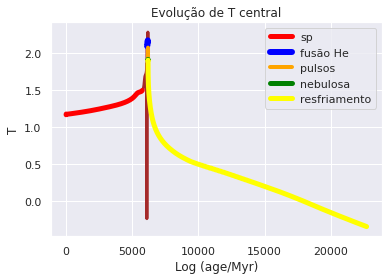

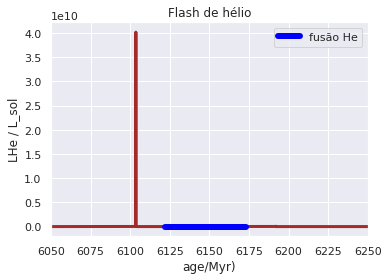

In [ ]:
#ciclos cno e pp
fig, ax1 = plt.subplots(figsize=(5.5,4))

ax1.plot(10**df['log(age/Myr)'], df['Tc'], color ="brown", lw=3)
ax1.plot(10**df_sp['log(age/Myr)'], df_sp['Tc'], color ="red",lw=5, label ="sp")
ax1.plot(10**df_he['log(age/Myr)'], df_he['Tc'], color ="blue",lw=6, label ="fusão He")
ax1.plot(10**df_pul['log(age/Myr)'], df_pul['Tc'], color ="orange",lw=4, label ="pulsos")
ax1.plot(10**df_neb['log(age/Myr)'], df_neb['Tc'], color ="green",lw=5, label  = "nebulosa")
ax1.plot(10**df_res['log(age/Myr)'], df_res['Tc'], color ="yellow",lw=5, label = "resfriamento")
'''
ax1.plot(df['log(age/Myr)'], df['Tc'], color ="brown", lw=3)
ax1.plot(df_sp['log(age/Myr)'], df_sp['Tc'], color ="red",lw=5, label ="sp")
ax1.plot(df_he['log(age/Myr)'], df_he['Tc'], color ="blue",lw=6, label ="fusão He")
ax1.plot(df_pul['log(age/Myr)'], df_pul['Tc'], color ="orange",lw=4, label ="pulsos")
ax1.plot(df_neb['log(age/Myr)'], df_neb['Tc'], color ="green",lw=5, label  = "nebulosa")
ax1.plot(df_res['log(age/Myr)'], df_res['Tc'], color ="yellow",lw=5, label = "resfriamento")

ax1.plot(df.index, df['Tc'], color ="brown", lw=3)
ax1.plot(df_sp.index, df_sp['Tc'], color ="red",lw=5, label ="sp")
ax1.plot(df_he.index, df_he['Tc'], color ="blue",lw=6, label ="fusão He")
ax1.plot(df_pul.index, df_pul['Tc'], color ="orange",lw=4, label ="pulsos")
ax1.plot(df_neb.index, df_neb['Tc'], color ="green",lw=5, label  = "nebulosa")
ax1.plot(df_res.index, df_res['Tc'], color ="yellow",lw=5, label = "resfriamento")
'''
ax1.set_title("Evolução de T central")
ax1.set_xlabel("Log (age/Myr)")
ax1.set_ylabel("T")
ax1.legend()
fig.tight_layout()
fig.show()


#ciclos cno e pp
fig, ax1 = plt.subplots(figsize=(5.5,4))
ax1.plot(10**df['log(age/Myr)'], 10**df['LHe'], color ="brown", lw=3)
#ax1.plot(10**df_sp['log(age/Myr)'], df_sp['Log L'], color ="red",lw=5, label ="sp")
#ax1.plot(10**df_he['log(age/Myr)'], 10**df_he['Log L'], color ="blue",lw=6, label ="fusão He")
ax1.plot(10**df_he['log(age/Myr)'], 10**df_he['LHe'], color ="blue",lw=6, label ="fusão He")
#ax1.plot(10**df_pul['log(age/Myr)'], df_pul['Log L'], color ="orange",lw=4, label ="pulsos")
#ax1.plot(10**df_neb['log(age/Myr)'], df_neb['Log L'], color ="green",lw=5, label  = "nebulosa")
#ax1.plot(10**df_res['log(age/Myr)'], df_res['Log L'], color ="yellow",lw=5, label = "resfriamento")
'''
ax1.plot(df.index, df['Log L'], color ="brown", lw=3)
ax1.plot(df_sp.index, df_sp['Log L'], color ="red",lw=5, label ="sp")
ax1.plot(df_he.index, df_he['Log L'], color ="blue",lw=6, label ="fusão He")
ax1.plot(df_pul.index, df_pul['Log L'], color ="orange",lw=4, label ="pulsos")
ax1.plot(df_neb.index, df_neb['Log L'], color ="green",lw=5, label  = "nebulosa")
ax1.plot(df_res.index, df_res['Log L'], color ="yellow",lw=5, label = "resfriamento")
'''
ax1.set_title("Flash de hélio")
ax1.set_xlabel("age/Myr)")
ax1.set_ylabel("LHe / L_sol")
ax1.set_xlim(6050,6250)

ax1.legend()
fig.tight_layout()
fig.show()
fig.savefig("heliumflash")

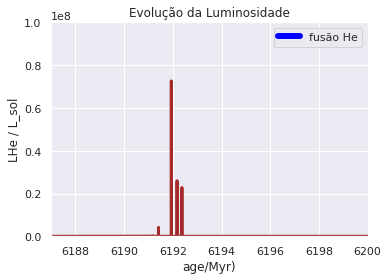

In [ ]:
fig, ax1 = plt.subplots(figsize=(5.5,4))
ax1.plot(10**df['log(age/Myr)'], 10**df['LHe'], color ="brown", lw=3)
ax1.plot(10**df_he['log(age/Myr)'], 10**df_he['LHe'], color ="blue",lw=6, label ="fusão He")

ax1.set_title("Evolução da Luminosidade")
ax1.set_xlabel("age/Myr)")
ax1.set_ylabel("LHe / L_sol")
ax1.set_ylim(0,100000000)
ax1.set_xlim(6187,6200)
ax1.legend()
fig.tight_layout()
fig.show()

ax1.legend()
fig.tight_layout()
fig.show()

In [ ]:
#abundância no final da evolução
print("H",df['Hcen'].iloc[-1] )
print("He",df['Hecen'].iloc[-1] )
print("C",df['C12cen'].iloc[-1] )
print("O",df['O16cen'].iloc[-1] )

H 1.6835299999999996e-55
He 2.20055e-36
C 0.235214
O 0.7647699999999998


massa final 0.56413


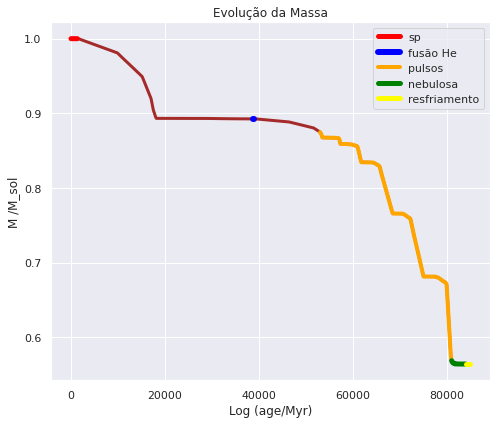

In [ ]:
#ciclos cno e pp
fig, ax1 = plt.subplots(figsize=(7,6))
'''
ax1.plot(df['log(age/Myr)'], df['Massa'], color ="brown", lw=3)
ax1.plot(df_sp['log(age/Myr)'], df_sp['Massa'], color ="red",lw=5, label ="sp")
ax1.plot(df_he['log(age/Myr)'], df_he['Massa'], color ="blue",lw=6, label ="fusão He")
ax1.plot(df_pul['log(age/Myr)'], df_pul['Massa'], color ="orange",lw=4, label ="pulsos")
ax1.plot(df_neb['log(age/Myr)'], df_neb['Massa'], color ="green",lw=5, label  = "nebulosa")
ax1.plot(df_res['log(age/Myr)'], df_res['Massa'], color ="yellow",lw=5, label = "resfriamento")
'''
ax1.plot(df.index, df['Massa'], color ="brown", lw=3)
ax1.plot(df_sp.index, df_sp['Massa'], color ="red",lw=5, label ="sp")
ax1.plot(df_he.index, df_he['Massa'], color ="blue",lw=6, label ="fusão He")
ax1.plot(df_pul.index, df_pul['Massa'], color ="orange",lw=4, label ="pulsos")
ax1.plot(df_neb.index, df_neb['Massa'], color ="green",lw=5, label  = "nebulosa")
ax1.plot(df_res.index, df_res['Massa'], color ="yellow",lw=5, label = "resfriamento")

ax1.set_title("Evolução da Massa")
ax1.set_xlabel("Log (age/Myr)")
ax1.set_ylabel("M / M_sol")
ax1.legend()
fig.tight_layout()
fig.show()
fig.savefig("ProdSP")


print("massa final", df_res.iloc[-1]['Massa'])